<a href="https://colab.research.google.com/github/ParagPalkar/Image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image Classification - Clothing
A neural network is crated to 
classify articles of clothing. To achieve this, a sub module of TensorFlow called keras is used.


# Input a number and the model will guess the image belongs to which class

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision

The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here, this dataset includes 60,000 images for training and 10,000 images for validation/testing.


---
# Installation

Press Ctrl + F9 to rerun all the cells again on your browser/machine








# Import


In [13]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

train_images.shape

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


(60000, 28, 28)

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.Labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

Here is how the image looks

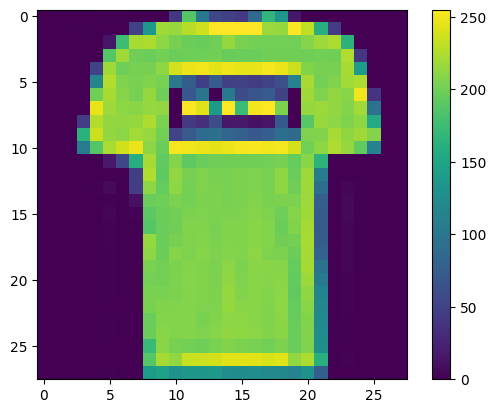

In [16]:
train_images[0,23,23]  # one pixel

train_labels[:10]  # first 10 training labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show() 
             

Data Preprocessing and Model Building

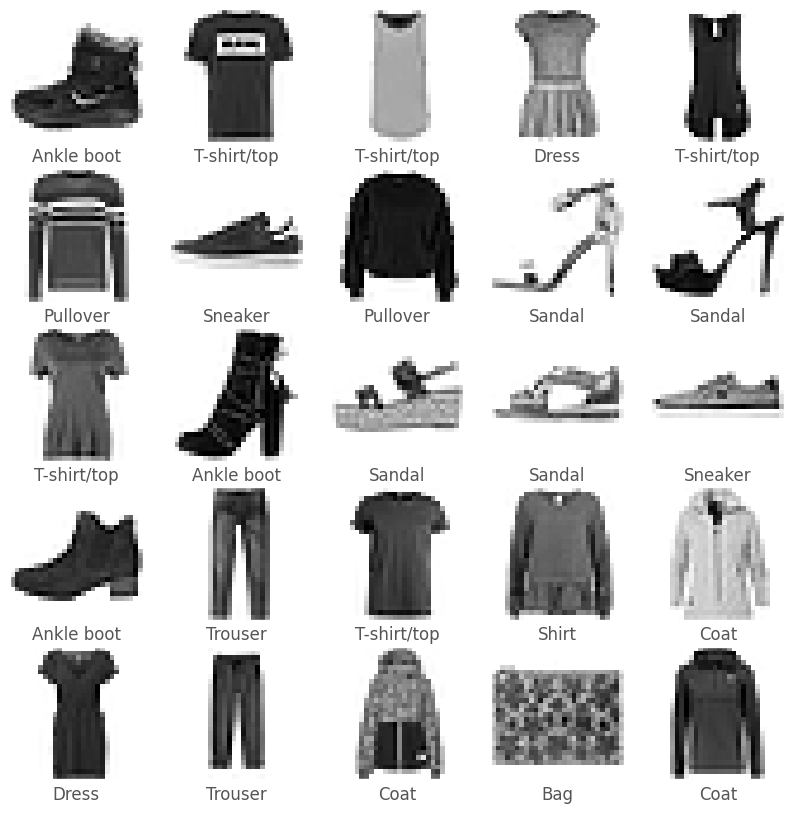

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10)) #display the first 25 images from dataset
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [8]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5005 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3761 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3359 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3130 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2959 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2711 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2583 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2478 - accuracy: 0.9070
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3428 

In [9]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


9

# Rerun the cell below to get different output

Based on the number inout from the user, the model will search that image and predict the image to be of a certaing class as a guess

Pick a number: 12
1/1 [==============================] - 0s 64ms/step


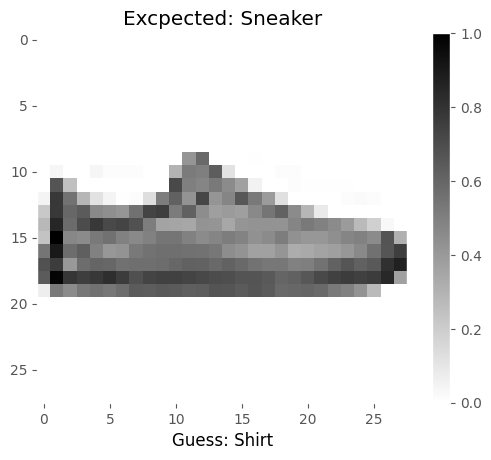

In [46]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)



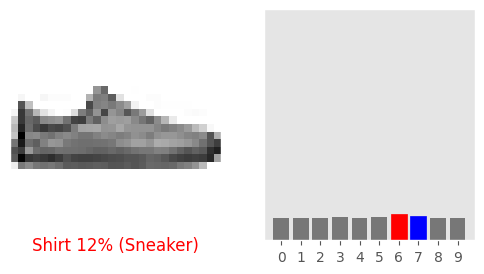

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
i = num
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

The above visualisation plots the incorrect predictions by models in Red color